[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)]()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
# Step 1: Generate synthetic data for two classes
n_samples = 100
mean0 = [0, 0]
cov0 = [[1, 0], [0, 1]]
data0 = np.random.multivariate_normal(mean0, cov0, n_samples)

mean1 = [3, 3]
cov1 = [[2, 0], [0, 2]]
data1 = np.random.multivariate_normal(mean1, cov1, n_samples)

X_train = np.vstack((data0[:50], data1[:50]))
y_train = np.array([0] * 50 + [1] * 50)

X_test = np.vstack((data0[50:], data1[50:]))
y_test = np.array([0] * 50 + [1] * 50)

X = np.vstack((X_train, X_test))

In [3]:
# Step 2: Fit Gaussian Mixture Models to each class
gmm0 = GaussianMixture(n_components=1).fit(X_train[:50])
gmm1 = GaussianMixture(n_components=1).fit(X_train[50:])

# Step 3: Predict classes for test data and compute accuracy
y_pred = []
for x in X_test:
    like0 = gmm0.score(x.reshape(1, -1))
    like1 = gmm1.score(x.reshape(1, -1))
    if like0 > like1:
        y_pred.append(0)
    else:
        y_pred.append(1)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.930


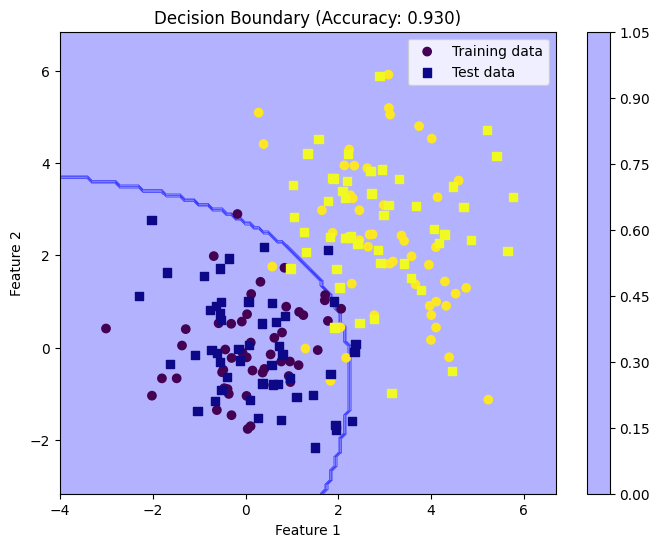

In [4]:
# Step 4: Visualize decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([0] * len(grid))
for i, (x, y) in enumerate(zip(grid[:, 0], grid[:, 1])):
    like0 = gmm0.score(np.array([x, y]).reshape(1, -1))
    like1 = gmm1.score(np.array([x, y]).reshape(1, -1))
    if like0 > like1:
        Z[i] = 0
    else:
        Z[i] = 1

Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
contour = plt.contourf(xx, yy, Z, colors="blue", alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", label="Training data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="plasma", marker="s", label="Test data")

plt.colorbar(contour)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Decision Boundary (Accuracy: {accuracy:.3f})")
plt.legend()
plt.show()

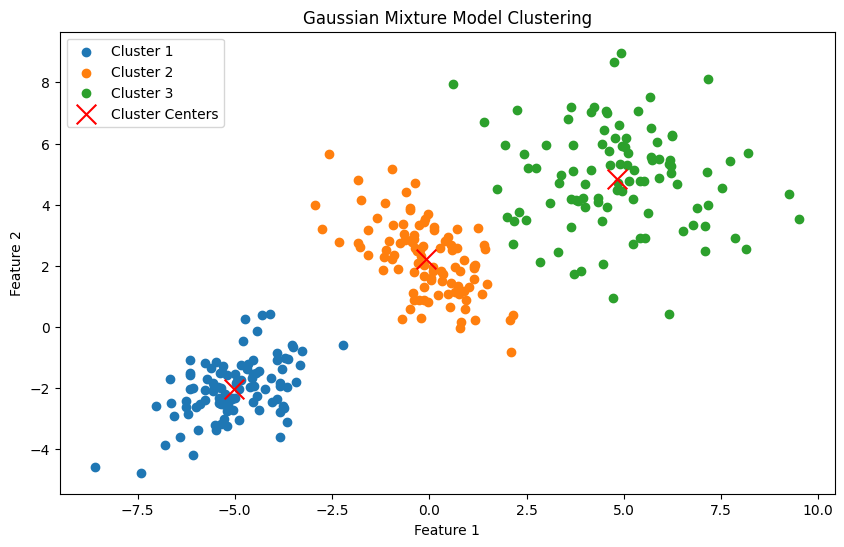

Silhouette Score: 0.620194681166095
Adjusted Rand Index: 1.0


In [5]:
# Step 1: Generate synthetic data with multiple clusters
n_samples = 300
cluster_centers = np.array([[-5, -2], [0, 2], [5, 5]])
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]], [[3, 0], [0, 3]]]

X = np.array(
    [
        np.random.multivariate_normal(center, cov, int(n_samples / 3))
        for center, cov in zip(cluster_centers, covariances)
    ]
)

X = np.vstack(X)

# Step 2: Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type="full")
gmm.fit(X)

# Step 3: Predict cluster labels
labels = gmm.predict(X)

# Step 4: Visualize the clusters and their means
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Cluster {i+1}")
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker="x", s=200, c="red", label="Cluster Centers")
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Step 5: Evaluate clustering performance
from sklearn.metrics import silhouette_score, adjusted_rand_score

print("Silhouette Score:", silhouette_score(X, labels))
print(
    "Adjusted Rand Index:", adjusted_rand_score(labels, np.array([0] * 100 + [1] * 100 + [2] * 100))
)